**Importing Libraries**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
pd.set_option('display.max_columns', None)



In [2]:
#Importing Files 
df=pd.read_csv(r"c:\Users\user\Desktop\Kaggle Datasets\digital_diet_mental_health.csv")


**Dataset First 5 Rows**

In [3]:

df.head(5).style.background_gradient(cmap="Blues")


,user_id,age,gender,daily_screen_time_hours,phone_usage_hours,laptop_usage_hours,tablet_usage_hours,tv_usage_hours,social_media_hours,work_related_hours,entertainment_hours,gaming_hours,sleep_duration_hours,sleep_quality,mood_rating,stress_level,physical_activity_hours_per_week,location_type,mental_health_score,uses_wellness_apps,eats_healthy,caffeine_intake_mg_per_day,weekly_anxiety_score,weekly_depression_score,mindfulness_minutes_per_day
0,user_1,51,Female,4.800000,3.400000,1.300000,1.600000,1.600000,4.100000,2.000000,1.000000,1.700000,6.600000,6,6,10,0.700000,Urban,32,1,1,125.200000,13,15,4.000000
1,user_2,64,Male,3.900000,3.500000,1.800000,0.900000,2.000000,2.700000,3.100000,1.000000,1.500000,4.500000,7,5,6,4.300000,Suburban,75,0,1,150.400000,19,18,6.500000
2,user_3,41,Other,10.500000,2.100000,2.600000,0.700000,2.200000,3.000000,2.800000,4.100000,1.700000,7.100000,9,5,5,3.100000,Suburban,22,0,0,187.900000,7,3,6.900000
3,user_4,27,Other,8.800000,0.000000,0.000000,0.700000,2.500000,3.300000,1.600000,1.300000,0.400000,5.100000,9,10,5,0.000000,Rural,22,0,1,73.600000,7,2,4.800000
4,user_5,55,Male,5.900000,1.700000,1.100000,1.500000,1.600000,1.100000,3.600000,0.800000,0.800000,7.400000,2,8,7,3.000000,Urban,64,1,1,217.500000,8,10,0.000000


**Dataset Info**

In [4]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   user_id                           2000 non-null   object 
 1   age                               2000 non-null   int64  
 2   gender                            2000 non-null   object 
 3   daily_screen_time_hours           2000 non-null   float64
 4   phone_usage_hours                 2000 non-null   float64
 5   laptop_usage_hours                2000 non-null   float64
 6   tablet_usage_hours                2000 non-null   float64
 7   tv_usage_hours                    2000 non-null   float64
 8   social_media_hours                2000 non-null   float64
 9   work_related_hours                2000 non-null   float64
 10  entertainment_hours               2000 non-null   float64
 11  gaming_hours                      2000 non-null   float64
 12  sleep_

**Hadling Missing Values**

In [5]:
df.isna().sum()

user_id                             0
age                                 0
gender                              0
daily_screen_time_hours             0
phone_usage_hours                   0
laptop_usage_hours                  0
tablet_usage_hours                  0
tv_usage_hours                      0
social_media_hours                  0
work_related_hours                  0
entertainment_hours                 0
gaming_hours                        0
sleep_duration_hours                0
sleep_quality                       0
mood_rating                         0
stress_level                        0
physical_activity_hours_per_week    0
location_type                       0
mental_health_score                 0
uses_wellness_apps                  0
eats_healthy                        0
caffeine_intake_mg_per_day          0
weekly_anxiety_score                0
weekly_depression_score             0
mindfulness_minutes_per_day         0
dtype: int64

**Handling Duplicates**

In [6]:
df.duplicated().sum()

np.int64(0)

**Average Electronic Device Usage**

In [7]:
phone_avg_usage=df["phone_usage_hours"].mean()
laptop_avg_usage=df["laptop_usage_hours"].mean()
tv_avg_usage=df["tv_usage_hours"].mean()
tablet_avg_usage=df["tablet_usage_hours"].mean()
print(f"The Average Phone Usage Is:{phone_avg_usage:.2f} Hour\n The Average Laptop Usage Is:{laptop_avg_usage:.2f} Hour\n The Average TV Usage Is {tv_avg_usage:.2f} Hour\n The Average Tablet Usage Is {tablet_avg_usage:.2f} Hour" )


The Average Phone Usage Is:3.02 Hour
 The Average Laptop Usage Is:2.00 Hour
 The Average TV Usage Is 1.50 Hour
 The Average Tablet Usage Is 1.00 Hour


**Create a DataFrame for visualization**

C:\Users\user\AppData\Local\Temp\ipykernel_13436\1339378411.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Device", y="Usage Hours", data=usage_data,palette=palette)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


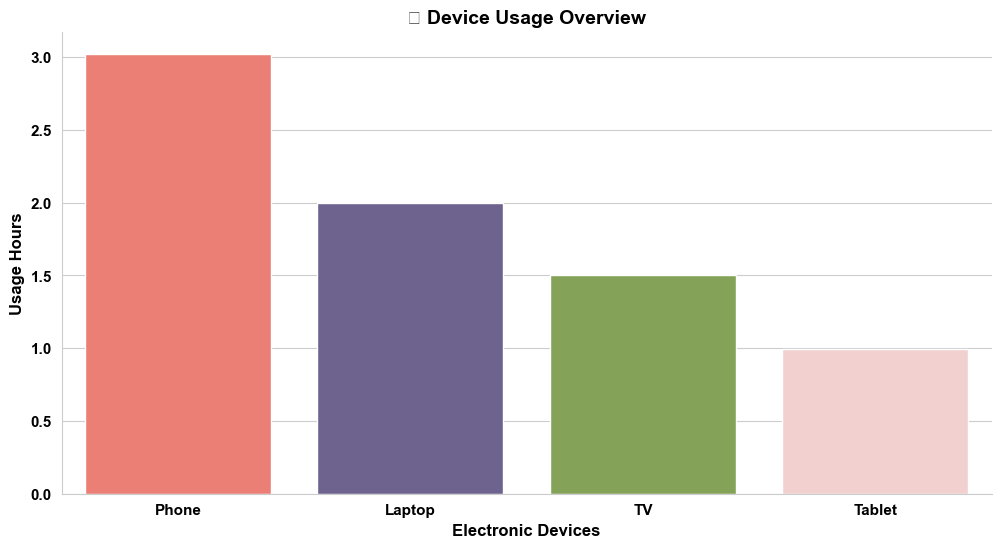

In [8]:
usage_data = pd.DataFrame({
    "Device": ["Phone", "Laptop", "TV", "Tablet"],
    "Usage Hours": [phone_avg_usage, laptop_avg_usage, tv_avg_usage, tablet_avg_usage]
})

# Set style and color palette
sns.set_style("whitegrid")
palette = ["#ff6f61", "#6b5b95", "#88b04b", "#f7cac9"] # Custom colors

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x="Device", y="Usage Hours", data=usage_data,palette=palette)

# Enhancements
plt.gca().set_title("📊 Device Usage Overview", fontsize=14, fontweight="bold", color="black")
plt.xlabel("Electronic Devices",fontsize=12,fontweight="bold",color="black")
plt.ylabel("Usage Hours",fontsize=12,fontweight="bold",color="black")



# Customize axis labels
plt.xticks(fontsize=11, fontweight="bold", color="black")
plt.yticks(fontsize=11,fontweight="bold", color="black")

# Remove top and right borders for a cleaner look
sns.despine()

# Show the plot
plt.show()


In [9]:
df.head(5)

,user_id,age,gender,daily_screen_time_hours,phone_usage_hours,laptop_usage_hours,tablet_usage_hours,tv_usage_hours,social_media_hours,work_related_hours,entertainment_hours,gaming_hours,sleep_duration_hours,sleep_quality,mood_rating,stress_level,physical_activity_hours_per_week,location_type,mental_health_score,uses_wellness_apps,eats_healthy,caffeine_intake_mg_per_day,weekly_anxiety_score,weekly_depression_score,mindfulness_minutes_per_day
0,user_1,51,Female,4.8,3.4,1.3,1.6,1.6,4.1,2.0,1.0,1.7,6.6,6,6,10,0.7,Urban,32,1,1,125.2,13,15,4.0
1,user_2,64,Male,3.9,3.5,1.8,0.9,2.0,2.7,3.1,1.0,1.5,4.5,7,5,6,4.3,Suburban,75,0,1,150.4,19,18,6.5
2,user_3,41,Other,10.5,2.1,2.6,0.7,2.2,3.0,2.8,4.1,1.7,7.1,9,5,5,3.1,Suburban,22,0,0,187.9,7,3,6.9
3,user_4,27,Other,8.8,0.0,0.0,0.7,2.5,3.3,1.6,1.3,0.4,5.1,9,10,5,0.0,Rural,22,0,1,73.6,7,2,4.8
4,user_5,55,Male,5.9,1.7,1.1,1.5,1.6,1.1,3.6,0.8,0.8,7.4,2,8,7,3.0,Urban,64,1,1,217.5,8,10,0.0


**which Gender Has The Highest Daily Screen Time Hours**

In [10]:
highest_screen_time_by_gender=df.groupby("gender")["daily_screen_time_hours"].sum().reset_index()
print(highest_screen_time_by_gender)

   gender  daily_screen_time_hours
0  Female                   5628.5
1    Male                   5339.3
2   Other                   1083.4


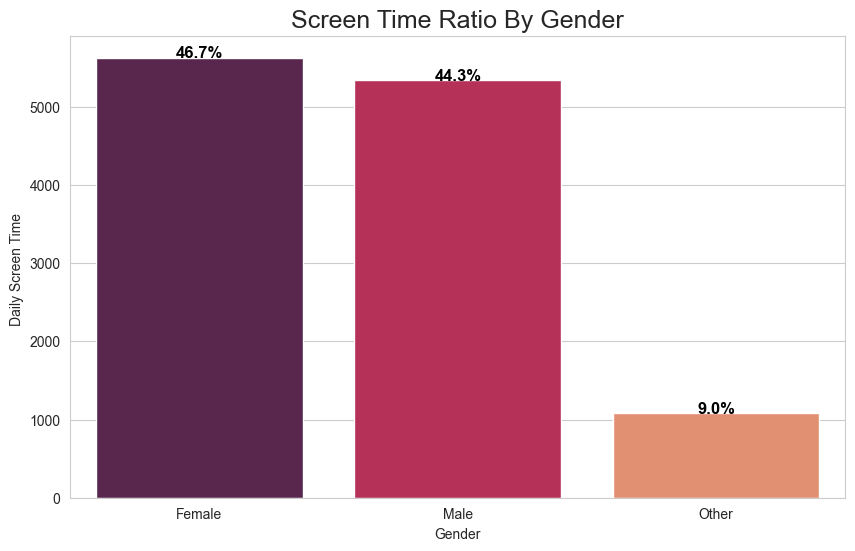

In [11]:
highest_screen_time_by_gender=df.groupby("gender")["daily_screen_time_hours"].sum().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=highest_screen_time_by_gender, x="gender",y="daily_screen_time_hours",hue="gender",palette="rocket")
#Calculate total screen time
total_screen_time = highest_screen_time_by_gender["daily_screen_time_hours"].sum()
sns.set_theme(style="whitegrid", context="talk") 
# Calculate percentage contribution
highest_screen_time_by_gender["percentage"] = (highest_screen_time_by_gender["daily_screen_time_hours"] / total_screen_time) * 100
# Annotate bars with percentage values
for i in range(len(highest_screen_time_by_gender)):
    plt.text(i, highest_screen_time_by_gender["daily_screen_time_hours"][i] + 0.5, 
             f'{highest_screen_time_by_gender["percentage"][i]:.1f}%', 
             ha="center", fontsize=12, fontweight="bold", color="black")

plt.xlabel("Gender")
plt.ylabel("Daily Screen Time ")
plt.title("Screen Time Ratio By Gender")
plt.show()


**Mental Health Score Classification By Gender**

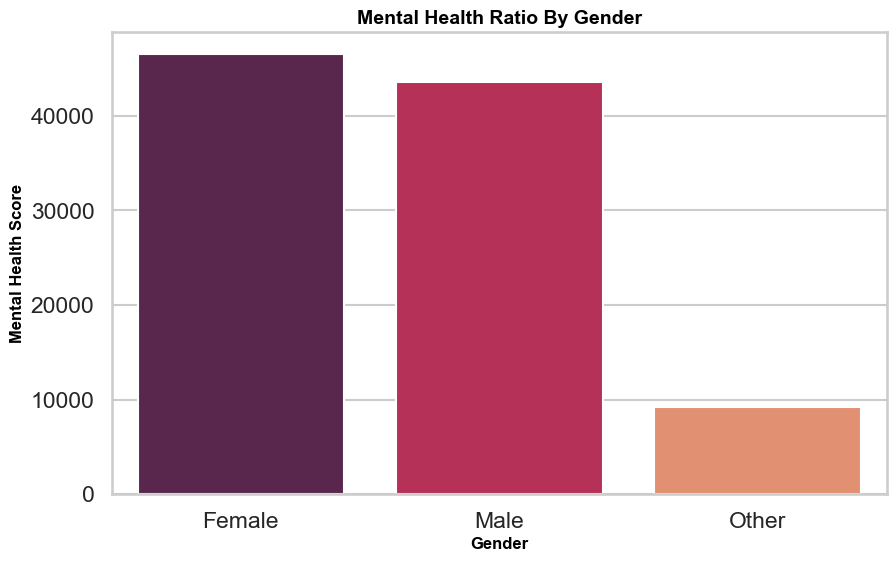

In [12]:
Mentalhealth_by_gender=df.groupby("gender")["mental_health_score"].sum().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=Mentalhealth_by_gender,x="gender",y="mental_health_score",hue="gender", palette="rocket")
plt.title("Mental Health Ratio By Gender",fontsize=14,fontweight="bold",color="black")
plt.xlabel("Gender",fontweight="bold",fontsize=12,color="black")
plt.ylabel("Mental Health Score",fontweight="bold",fontsize=12,color="black")
plt.show()

In [13]:
df["mental_health_score"].describe()

count    2000.000000
mean       49.650500
std        17.546717
min        20.000000
25%        35.000000
50%        49.000000
75%        64.250000
max        80.000000
Name: mental_health_score, dtype: float64

**Mental Score Calculation**

In [14]:
x=df[df["mental_health_score"]>70].shape[0]
y=df[df["mental_health_score"]<30].shape[0]

print(f"{x}many people have a mental score greater than 70")
print(f'{y} many people have a mental score less than 30')


333many people have a mental score greater than 70
326 many people have a mental score less than 30


In [15]:
df.head(5)

,user_id,age,gender,daily_screen_time_hours,phone_usage_hours,laptop_usage_hours,tablet_usage_hours,tv_usage_hours,social_media_hours,work_related_hours,entertainment_hours,gaming_hours,sleep_duration_hours,sleep_quality,mood_rating,stress_level,physical_activity_hours_per_week,location_type,mental_health_score,uses_wellness_apps,eats_healthy,caffeine_intake_mg_per_day,weekly_anxiety_score,weekly_depression_score,mindfulness_minutes_per_day
0,user_1,51,Female,4.8,3.4,1.3,1.6,1.6,4.1,2.0,1.0,1.7,6.6,6,6,10,0.7,Urban,32,1,1,125.2,13,15,4.0
1,user_2,64,Male,3.9,3.5,1.8,0.9,2.0,2.7,3.1,1.0,1.5,4.5,7,5,6,4.3,Suburban,75,0,1,150.4,19,18,6.5
2,user_3,41,Other,10.5,2.1,2.6,0.7,2.2,3.0,2.8,4.1,1.7,7.1,9,5,5,3.1,Suburban,22,0,0,187.9,7,3,6.9
3,user_4,27,Other,8.8,0.0,0.0,0.7,2.5,3.3,1.6,1.3,0.4,5.1,9,10,5,0.0,Rural,22,0,1,73.6,7,2,4.8
4,user_5,55,Male,5.9,1.7,1.1,1.5,1.6,1.1,3.6,0.8,0.8,7.4,2,8,7,3.0,Urban,64,1,1,217.5,8,10,0.0


**Converting Datatypes**

In [16]:
df.columns

Index(['user_id', 'age', 'gender', 'daily_screen_time_hours',
       'phone_usage_hours', 'laptop_usage_hours', 'tablet_usage_hours',
       'tv_usage_hours', 'social_media_hours', 'work_related_hours',
       'entertainment_hours', 'gaming_hours', 'sleep_duration_hours',
       'sleep_quality', 'mood_rating', 'stress_level',
       'physical_activity_hours_per_week', 'location_type',
       'mental_health_score', 'uses_wellness_apps', 'eats_healthy',
       'caffeine_intake_mg_per_day', 'weekly_anxiety_score',
       'weekly_depression_score', 'mindfulness_minutes_per_day'],
      dtype='object')

In [17]:
import pandas as pd

# Define numeric columns as a proper list
numeric_cols = [
    "daily_screen_time_hours", "phone_usage_hours", "laptop_usage_hours", "tablet_usage_hours",
    "tv_usage_hours", "social_media_hours", "work_related_hours", "entertainment_hours",
    "gaming_hours", "sleep_duration_hours", "sleep_quality", "mood_rating", "stress_level",
    "physical_activity_hours_per_week", "mental_health_score", "uses_wellness_apps", "eats_healthy",
    "caffeine_intake_mg_per_day", "weekly_anxiety_score", "weekly_depression_score",
    "mindfulness_minutes_per_day"
]

# Convert these columns to numeric (handling errors)
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors="coerce")

# Print data types to verify conversion
print(df.dtypes)


user_id                              object
age                                   int64
gender                               object
daily_screen_time_hours             float64
phone_usage_hours                   float64
laptop_usage_hours                  float64
tablet_usage_hours                  float64
tv_usage_hours                      float64
social_media_hours                  float64
work_related_hours                  float64
entertainment_hours                 float64
gaming_hours                        float64
sleep_duration_hours                float64
sleep_quality                         int64
mood_rating                           int64
stress_level                          int64
physical_activity_hours_per_week    float64
location_type                        object
mental_health_score                   int64
uses_wellness_apps                    int64
eats_healthy                          int64
caffeine_intake_mg_per_day          float64
weekly_anxiety_score            

In [18]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   user_id                           2000 non-null   object 
 1   age                               2000 non-null   int64  
 2   gender                            2000 non-null   object 
 3   daily_screen_time_hours           2000 non-null   float64
 4   phone_usage_hours                 2000 non-null   float64
 5   laptop_usage_hours                2000 non-null   float64
 6   tablet_usage_hours                2000 non-null   float64
 7   tv_usage_hours                    2000 non-null   float64
 8   social_media_hours                2000 non-null   float64
 9   work_related_hours                2000 non-null   float64
 10  entertainment_hours               2000 non-null   float64
 11  gaming_hours                      2000 non-null   float64
 12  sleep_

**Classification By Gender And Age**

In [19]:
df["stress_level"].describe()

count    2000.000000
mean        5.541500
std         2.885731
min         1.000000
25%         3.000000
50%         6.000000
75%         8.000000
max        10.000000
Name: stress_level, dtype: float64

In [20]:
df.head(5)

,user_id,age,gender,daily_screen_time_hours,phone_usage_hours,laptop_usage_hours,tablet_usage_hours,tv_usage_hours,social_media_hours,work_related_hours,entertainment_hours,gaming_hours,sleep_duration_hours,sleep_quality,mood_rating,stress_level,physical_activity_hours_per_week,location_type,mental_health_score,uses_wellness_apps,eats_healthy,caffeine_intake_mg_per_day,weekly_anxiety_score,weekly_depression_score,mindfulness_minutes_per_day
0,user_1,51,Female,4.8,3.4,1.3,1.6,1.6,4.1,2.0,1.0,1.7,6.6,6,6,10,0.7,Urban,32,1,1,125.2,13,15,4.0
1,user_2,64,Male,3.9,3.5,1.8,0.9,2.0,2.7,3.1,1.0,1.5,4.5,7,5,6,4.3,Suburban,75,0,1,150.4,19,18,6.5
2,user_3,41,Other,10.5,2.1,2.6,0.7,2.2,3.0,2.8,4.1,1.7,7.1,9,5,5,3.1,Suburban,22,0,0,187.9,7,3,6.9
3,user_4,27,Other,8.8,0.0,0.0,0.7,2.5,3.3,1.6,1.3,0.4,5.1,9,10,5,0.0,Rural,22,0,1,73.6,7,2,4.8
4,user_5,55,Male,5.9,1.7,1.1,1.5,1.6,1.1,3.6,0.8,0.8,7.4,2,8,7,3.0,Urban,64,1,1,217.5,8,10,0.0


In [21]:
Classifi=df.groupby("gender")[["work_related_hours","entertainment_hours","gaming_hours","sleep_duration_hours","sleep_quality","mood_rating","stress_level","physical_activity_hours_per_week","mental_health_score"]].mean().reset_index()
print(Classifi.head(5))
plt.figure(figsize=(12,6))


   gender  work_related_hours  entertainment_hours  gaming_hours  \
0  Female            2.013262             2.479786      1.291551   
1    Male            2.000907             2.465079      1.283900   
2   Other            2.039891             2.414754      1.196721   

   sleep_duration_hours  sleep_quality  mood_rating  stress_level  \
0              6.507914       5.404278     5.550802      5.612834   
1              6.573696       5.671202     5.659864      5.539683   
2              6.514754       5.896175     5.464481      5.185792   

   physical_activity_hours_per_week  mental_health_score  
0                          3.050588            49.777540  
1                          3.131293            49.365079  
2                          3.061202            50.377049  


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

**Correlation Between Numeric Columns**

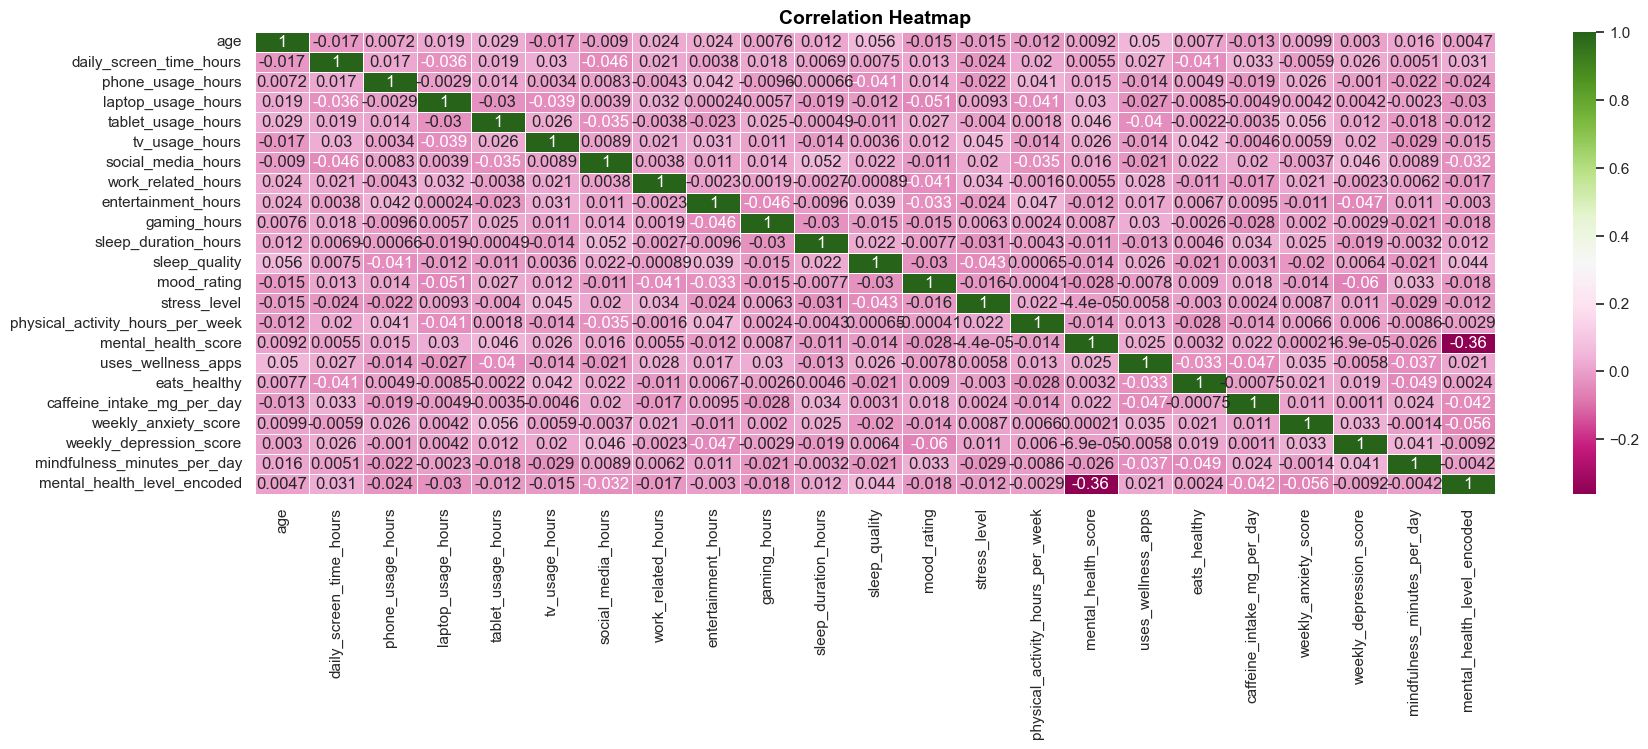

In [35]:
# Remove non-numeric columns before calculating correlation
corre = df.select_dtypes(include=["number"]).corr()
plt.figure(figsize=(20,6))
sns.heatmap(corre,annot=True,cmap="PiYG",linewidths=0.5)
plt.title("Correlation Heatmap",fontsize=14,fontweight="bold",color="black")
plt.show()

**Average Classification By Gender**

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


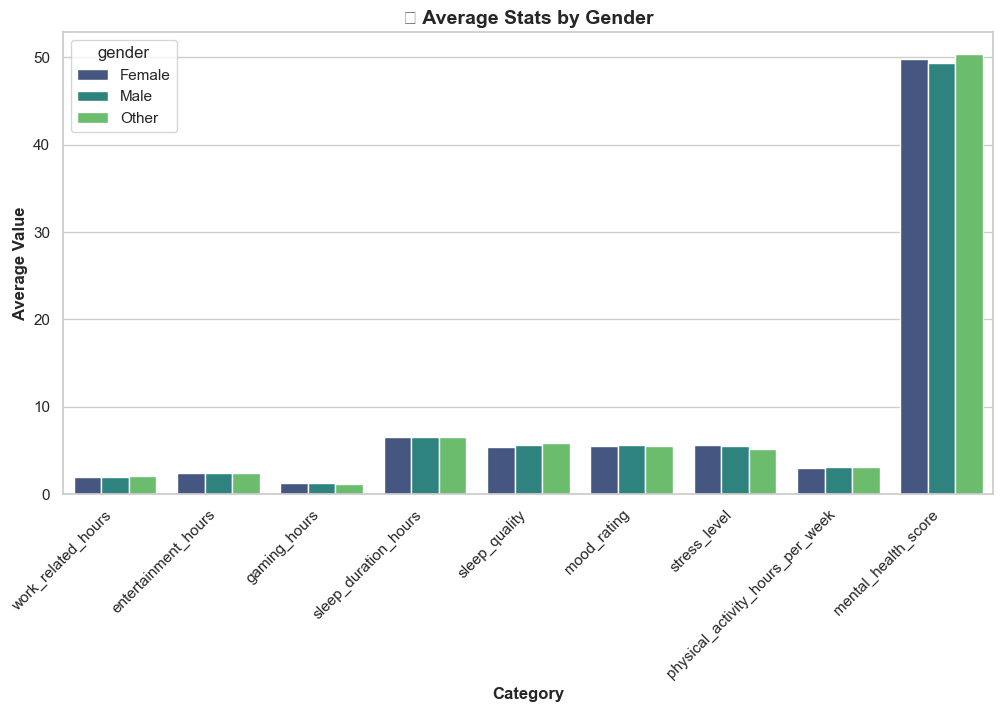

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert DataFrame to long format for better visualization
Classifi_melted = Classifi.melt(id_vars="gender", var_name="Category", value_name="Average Value")

# Set plot size and style
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")

# Create bar plot
sns.barplot(x="Category", y="Average Value", hue="gender", data=Classifi_melted, palette="viridis")

# Improve readability
plt.xticks(rotation=45, ha="right")  # Rotate labels
plt.xlabel("Category", fontsize=12, fontweight="bold")
plt.ylabel("Average Value", fontsize=12, fontweight="bold")
plt.title("📊 Average Stats by Gender", fontsize=14, fontweight="bold")

# Show plot
plt.show()


**Machine Learning Classifying Models**

Classification Report:
              precision    recall  f1-score   support

        High       0.00      0.00      0.00        71
         Low       0.00      0.00      0.00        62
      Medium       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.22      0.33      0.27       400
weighted avg       0.45      0.67      0.54       400



C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

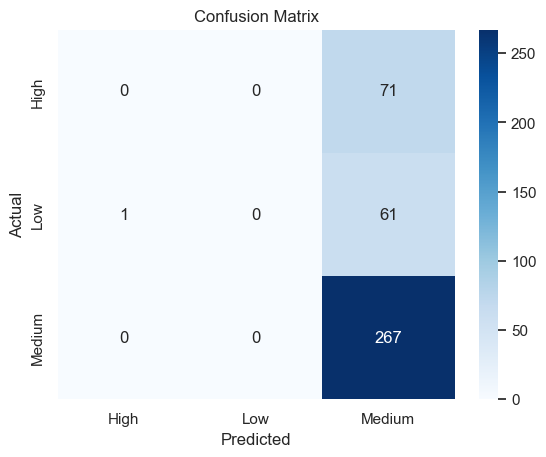

In [24]:
# --- Machine Learning: Classifying Mental Health Score ---

# Step 1: Classify mental_health_score into categories
def classify_score(score):
    if score < 30:
        return "Low"
    elif score < 70:
        return "Medium"
    else:
        return "High"

df["mental_health_level"] = df["mental_health_score"].apply(classify_score)

# Step 2: Encode target variable
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["mental_health_level_encoded"] = le.fit_transform(df["mental_health_level"])

# Step 3: Prepare features and target
X = df.select_dtypes(include=["number"]).drop(["mental_health_score", "mental_health_level_encoded"], axis=1)
y = df["mental_health_level_encoded"]

# Step 4: Split into training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train a classifier (Random Forest)
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 6: Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
